In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def draw_kelvin_angle(ax, x, x0=[0], color='cyan', alpha=0.3):
    slope = np.sqrt(1./8.)
    y = slope * x
    a = alpha
    for xz in x0:
        ax.fill_between(x+xz, y1=y, y2=-y, color=color, alpha=a)
        a += 0.1

def draw_inner_angle(ax, x, T, x0=[0], color='purple', alpha=0.3):
    slope = np.sqrt(T - 1.) / (2. * T - 1.)
    y = slope * x
    a = alpha
    for xz in x0:
        ax.fill_between(x+xz, y1=y, y2=-y, color=color, alpha=a)
        a += 0.1

def draw_parametric_wake(ax, nmax, k, x0=[0], color1='purple', color2='blue', phase=0.0):
    k32 = np.power(k, 1.5)
    xtterm = (2*k - 1) / k32
    ytterm = np.sqrt(k - 1) / k32
    inner = k < 1.5
    for n in range(1, nmax+1):
        xt = -np.pi * (2 * n + 1 + phase) * xtterm
        yt = -np.pi * (2 * n + 1 + phase) * ytterm
        for xz in x0:
            ax.plot(xt[inner]+xz, yt[inner], color=color1)
            ax.plot(xt[inner]+xz, -yt[inner], color=color1)
            ax.plot(xt[~inner]+xz, yt[~inner], color=color2)
            ax.plot(xt[~inner]+xz, -yt[~inner], color=color2)

/home/jcolen19/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.


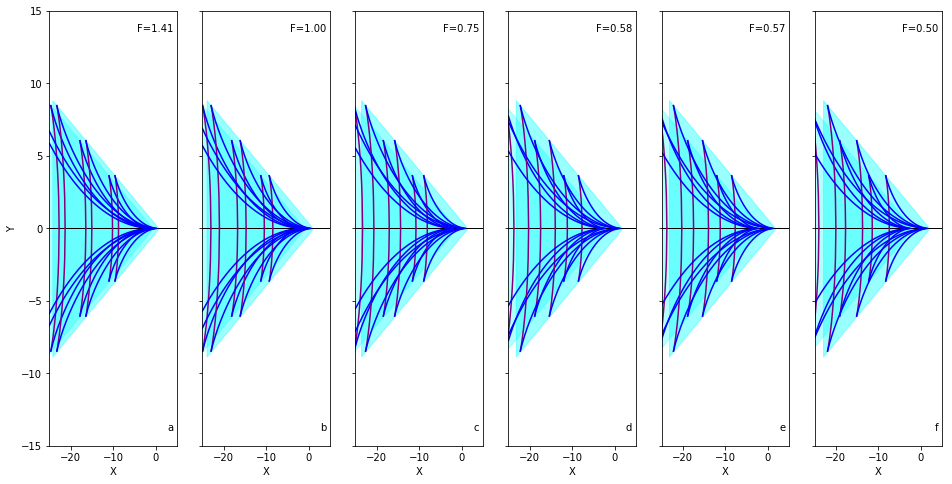

In [3]:
fs = [1.414, 1, 0.75, 0.58, 0.57, 0.5]
nfs = len(fs)
Q = 1000
tmax = np.ones(nfs) * Q * 100

fig = plt.figure(figsize=(16, 8))

xlim = np.array([-25, 5])
ylim = np.array([-15, 15])

label = 'a'

for i in range(nfs):
    fr = fs[i]
    ax = fig.add_subplot(1, nfs, i+1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.97, 0.97, 'F=%0.2f' % fr, 
                    transform=ax.transAxes,
                    horizontalalignment='right',
                    verticalalignment='top')
    ax.text(0.97, 0.03, label, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='bottom')
    label = chr(ord(label) + 1)
    if i == 0:
        ax.set_ylabel('Y')
    else:
        ax.tick_params(axis='y', which='both', labelleft=False)
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xlabel('X')
    ax.axhline(color='black', linewidth=1)
    k = np.linspace(1, Q, tmax[i])
    x0 = [-1. / fr, 1./ fr]
    xs = np.array([xlim[0], 0])
    
    draw_kelvin_angle(ax, xs, x0=x0)
    draw_parametric_wake(ax, 4, k, x0=x0)
    
plt.show()

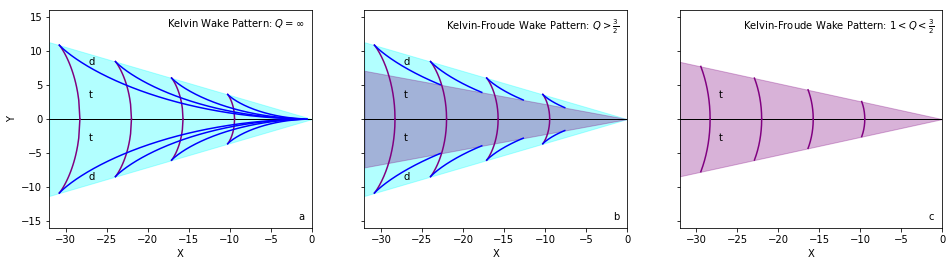

In [4]:
Qs = [1000, 5, 1.1]
tmax = [100000, 10000, 1000]
labels = [r'Kelvin Wake Pattern: $Q = \infty$', 
          r'Kelvin-Froude Wake Pattern: $Q > \frac{3}{2}$', 
          r'Kelvin-Froude Wake Pattern: $1 < Q < \frac{3}{2}$']
nqs = len(Qs)
fig = plt.figure(figsize=(16, 4))

xlim = np.array([-32, 0])
ylim = np.array([-16, 16])

label = 'a'

for i in range(nqs):
    ax = fig.add_subplot(1, nqs, i+1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.97, 0.97, labels[i], 
                    transform=ax.transAxes,
                    horizontalalignment='right',
                    verticalalignment='top')
    ax.text(0.97, 0.03, label, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='bottom')
    label = chr(ord(label) + 1)
    if i == 0:
        ax.set_ylabel('Y')
    else:
        ax.tick_params(axis='y', which='both', labelleft=False)
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xlabel('X')
    ax.axhline(color='black', linewidth=1)
    k = np.linspace(1, Qs[i], tmax[i])
    if Qs[i] > 1.5:
        draw_kelvin_angle(ax, xlim)
        ax.text(0.15, 0.22, 'd',
                transform=ax.transAxes)
        ax.text(0.15, 0.75, 'd',
                transform=ax.transAxes)
    if Qs[i] < 100:
        draw_inner_angle(ax, xlim, Qs[i])
    draw_parametric_wake(ax, 4, k)
    ax.text(0.15, 0.40, 't',
            transform=ax.transAxes)
    ax.text(0.15, 0.60, 't',
            transform=ax.transAxes)
    
plt.show()

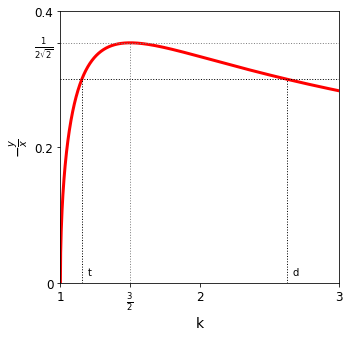

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()

xlim = [1, 3]
ylim = [0, 0.4]
xrng = xlim[1] - xlim[0]
yrng = ylim[1] - ylim[0]

xpk = 1.5
ypk = 1 / (2 * np.sqrt(2))

yh = 0.3
yh2 = yh * yh
xh1 = (1 + 4 * yh2 - np.sqrt(1 - 8 * yh2)) / (8 * yh2)
xh2 = (1 + 4 * yh2 + np.sqrt(1 - 8 * yh2)) / (8 * yh2)

lwmain = 3
lwdot = 1

x = np.linspace(xlim[0], xlim[1], 1000)
ax.plot(x, np.sqrt(x - 1) / (2 * x - 1), color='red', linewidth=lwmain)

#Lines touching the peak
ax.axhline(y=ypk, color='gray', linestyle=':', linewidth=lwdot)#, xmax=(xpk - xlim[0]) / xrng)
ax.axvline(x=xpk, color='gray', linestyle=':', linewidth=lwdot, ymax=(ypk - ylim[0]) / yrng)

#Intersection at two points
ax.axhline(y=yh, color='black', linestyle=':', linewidth=lwdot)#, xmax=(xh2 - xlim[0]) / xrng)
ax.axvline(x=xh1, color='black', linestyle=':', linewidth=lwdot, ymax=(yh - ylim[0]) / yrng)
ax.axvline(x=xh2, color='black', linestyle=':', linewidth=lwdot, ymax=(yh - ylim[0]) / yrng)

#Set ticks
plt.xticks([xlim[0], xpk, xlim[0] + xrng / 2, xlim[1]], 
           [xlim[0], r'$\frac{3}{2}$', xlim[0] + xrng / 2, xlim[1]],
           fontsize=12)
plt.yticks([ylim[0], ypk, ylim[0] + yrng / 2, ylim[1]], 
           [ylim[0], r'$\frac{1}{2\sqrt{2}}$', ylim[0] + yrng / 2, ylim[1]],
           fontsize=12)

#Add transverse/diverging labels
ax.text((xh1 - xlim[0]) / xrng + 0.02, 0.03, 't', 
        transform=ax.transAxes)
ax.text((xh2 - xlim[0]) / xrng + 0.02, 0.03, 'd',
        transform=ax.transAxes)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('k', fontsize=14)
ax.set_ylabel(r'$-\frac{y}{x}$', fontsize=14)
plt.show()